# Resistance plant gene prediction - EDA

## Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
from collections import Counter

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Dimensionality reduction
from sklearn.decomposition import PCA, LatentDirichletAllocation
import umap

# Standardization
from sklearn.preprocessing import StandardScaler


# Parameters 
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

## Data Loading

In [2]:
molecules = pd.read_csv('Data/train.csv')

In [3]:
molecules.sample(6)

,ID,Sequence,Label
12145,16230,MSSRDKPKTFAEVREEICKRREEMISRDNQKKTKTVAQVREEKGKR...,0
1658,2229,MRLLFSFCFFFFMIIFTATAYDPLDPSGNITIKWDIMSWTADGYVA...,0
10865,14556,MATSSHLLPQALHMIPRTPSFSSKNLGVSSILPRASSVNSRLSVSR...,0
2311,3104,MATNAAAPPCPCYDTPEGVDILGRYDPEFAAILTRDSLAFVAGLQR...,0
6947,9294,MTSGTRMPTWRERENNKRRERRRRAIAAKIFTGLRMYGNYELPKHC...,0
3372,4511,MDSTYALHLAVATLLGASFAAASAYYMHRKTLDQLLRFARSLDRDH...,0


In [4]:
molecules.iloc[0, 1]

'MDSRMDQYEVMEQIGRGAFGAAILVNHKTEKKKYVLKKIRLARQTERCRKSAHQEMALIARLQHPYIVEFKEAWVEKGCYVCIVTGYCEGGDMAELMKKANGTYFPEEKLLKWFAQLALAVDYLHSNFVLHRDLKCSNIFLTKDQDIRLGDFGLAKTLKADDLTSSVVGTPNYMCPELLADIPYGFKSDIWSLGCCMYEMAAHRPAFKAFDMAGLISKINRSSIGPLPPCYSPSMKSLIKSMLRKSPEHRPTASEILKSPYLQPYVNQYRPFADISHPIHSLEKPITSSRSSQKSMSGSQCSSISGSDIDSIQSSERNTSGPSTSSNNTIDTEGAEATDHVSVKNCSRSDDVKSNKETVGPELERQDSSKSIHVDQRPRNEIKQPKIIKKILTTLREESKLRQNNSPIRASRVKLNSPSNREQLSDDSKHSSDISSSSKSSEVTSRESAKVICEPVKRAQASPPLKHLSPIVEHSPKAKIKQDEPLQPDPAKQAMEDVDAAVGKVKNRTPPSYSRRLSIPPRRPLGAESPLHADTKRAHNKVIKERAKSPCRPVHGPDNDIIEPPGFPMAPPSPLGGVQMKVGNARAKSAPPRAVSIKEDSSDCSSSTIAYAENTELSEPSKQDSSAQLVSSCKCSIPDAAIQKHDLTAMPSSELNTTNFQKSMASNDDVCENLALEPSSDISEQVSIFKDNVPCSKISQSTANAIVQNDEDKFTVQELLSSVADIAPFVSTKNFALEKGSPPIQSLERTSSPHLNPPIEDVIHVIRHSSFRVCGEQAVAENAEMGVQSSDVGKLLNVVREEVDSRSIPSNNLVPHRLPDCAAPKPNISETNTISSKTACSDVVKFLTVPEVNSTTTAINNGFKEEASPTKEILDVKSFRQRAEALEGLLELSADLLQHNRLEELAVVLKPFGKDKVSPRETAIWLAKSFKGMMNDEASRSSM'

## Exploratory data analysis (EDA)

In [5]:
molecules.describe()

,ID,Label
count,14161.000000,14161.000000
mean,9469.114116,0.089965
std,5461.636271,0.286142
min,0.000000,0.000000
25%,4732.000000,0.000000
50%,9471.000000,0.000000
75%,14222.000000,0.000000
max,18881.000000,1.000000


In [6]:
molecules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14161 entries, 0 to 14160
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        14161 non-null  int64 
 1   Sequence  14161 non-null  object
 2   Label     14161 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 332.0+ KB


In [7]:
molecules.isna().sum()

ID          0
Sequence    0
Label       0
dtype: int64

### Sequences length descriptives

In [8]:
print('Average sequence length: ', molecules['Sequence'].str.len().mean())
print('Minimum sequence length: ',molecules['Sequence'].str.len().min())
print('Maximum sequence length: ',molecules['Sequence'].str.len().max())

Average sequence length:  436.0930725231269
Minimum sequence length:  50
Maximum sequence length:  2028


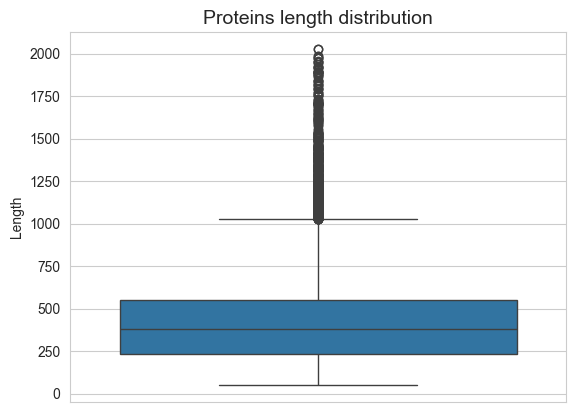

In [9]:
sns.boxplot(molecules['Sequence'].str.len())
plt.title('Proteins length distribution', fontsize=14)
plt.ylabel('Length')
plt.savefig('Figures/Protein_length_distribution.png')
plt.show()

### Aminos per sequence

In [10]:
aminos = []
for sequence in molecules.Sequence:
    amino_counter = Counter(sequence)
    aminos.append([len(amino_counter), amino_counter])

In [11]:
aminos[:2]

[[20,
  Counter({'S': 123,
           'K': 75,
           'A': 71,
           'L': 68,
           'P': 68,
           'E': 66,
           'V': 56,
           'I': 55,
           'D': 53,
           'R': 48,
           'N': 42,
           'T': 39,
           'Q': 35,
           'G': 35,
           'F': 23,
           'H': 23,
           'M': 22,
           'C': 21,
           'Y': 16,
           'W': 4})],
 [18,
  Counter({'K': 30,
           'A': 19,
           'E': 15,
           'G': 11,
           'S': 11,
           'P': 9,
           'I': 9,
           'L': 7,
           'V': 7,
           'T': 7,
           'R': 6,
           'F': 4,
           'M': 3,
           'Y': 3,
           'N': 3,
           'Q': 2,
           'H': 2,
           'D': 2})]]

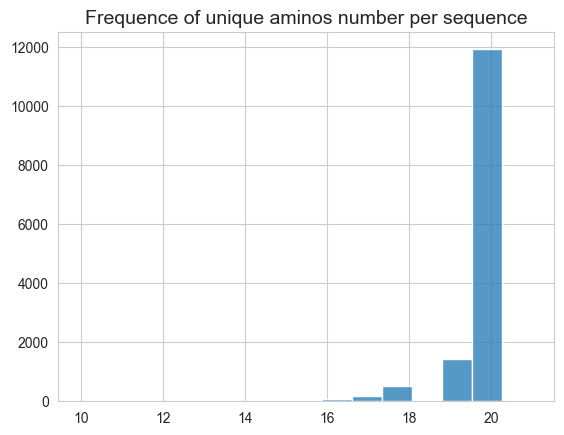

In [12]:
sns.histplot([row[0] for row in aminos])

plt.title('Frequence of unique aminos number per sequence', fontsize=14)
plt.ylabel(None)
plt.savefig('Figures/No_unique_aminos_per_sequence.png')
plt.show()

* Distribution of each amino per sequence

In [13]:
aminos_variance = pd.DataFrame([row[1] for row in aminos]).fillna(0).astype(int)
aminos_variance

,M,D,S,R,Q,Y,E,V,I,G,A,F,L,N,H,K,T,C,P,W,X,Z,B
0,22,53,123,48,35,16,66,56,55,35,71,23,68,42,23,75,39,21,68,4,0,0,0
1,3,2,11,6,2,3,15,7,9,11,19,4,7,3,2,30,7,0,9,0,0,0,0
2,2,2,7,5,3,1,3,7,3,5,3,5,12,6,3,5,3,1,4,1,0,0,0
3,10,9,27,6,13,15,12,31,19,22,22,23,41,13,5,22,24,10,15,5,0,0,0
4,9,21,28,20,9,8,19,27,19,43,41,8,32,11,10,17,10,6,11,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14156,4,4,7,2,2,3,12,5,2,5,9,3,9,3,1,11,5,0,3,2,0,0,0
14157,10,23,42,30,7,13,21,26,6,36,41,12,26,5,7,12,19,10,34,6,0,0,0
14158,4,21,26,19,12,11,23,14,8,26,10,12,15,19,16,21,14,11,16,4,0,0,0
14159,16,32,45,38,16,14,23,51,23,46,55,25,44,12,8,15,22,6,25,8,0,0,0


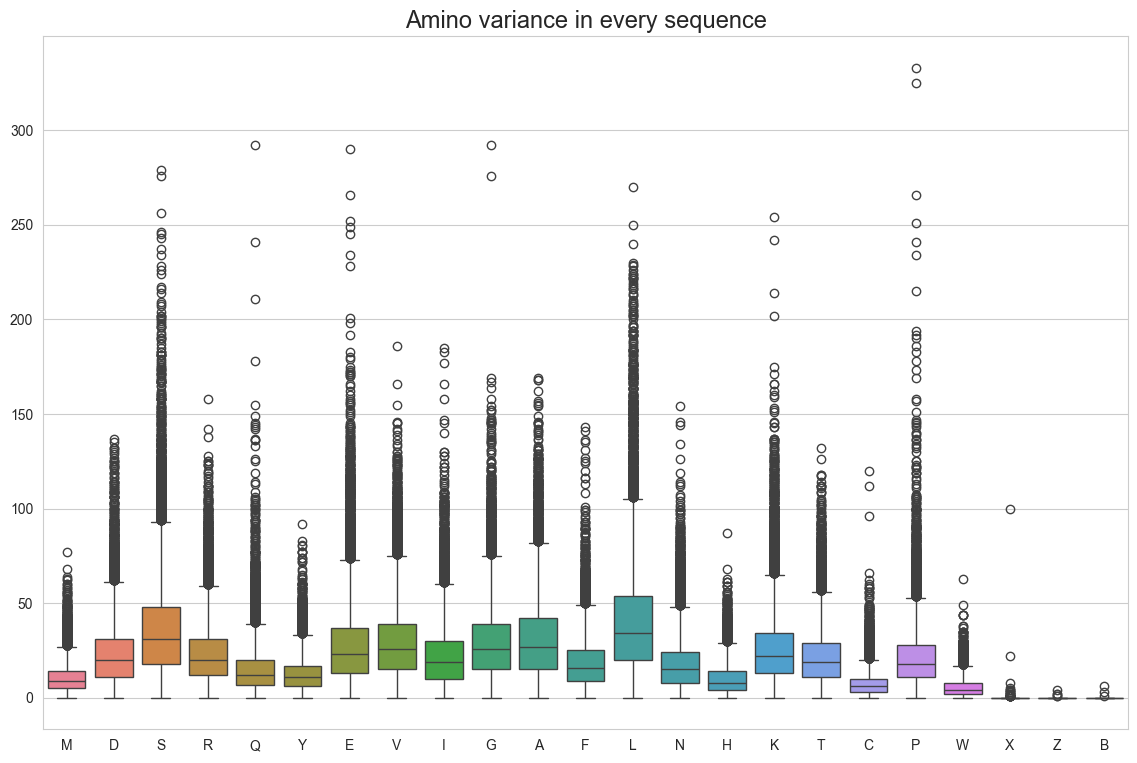

In [14]:
plt.figure(figsize=(14, 9))

sns.boxplot(aminos_variance)

plt.title('Amino variance in every sequence', fontsize=17)
plt.savefig('Figures/Amino_variance_in_sequences.png')
plt.show()

### Αmino's vector analysis

In [15]:
std = StandardScaler()
std_aminos_variance = std.fit_transform(aminos_variance)
std_aminos_variance[0]

array([ 1.41063492,  1.71611416,  3.03507988,  1.4125099 ,  1.43915476,
        0.37195906,  1.62469536,  1.3322836 ,  1.88800257,  0.25481206,
        1.83775524,  0.35077025,  0.86538582,  1.64513337,  1.68630142,
        2.42898654,  1.11511235,  1.95776886,  2.68056963, -0.28406428,
       -0.01439616, -0.01648259, -0.01239103])

In [16]:
pca = PCA(n_components=2)
reducer = umap.UMAP(n_components=2)
lda = LatentDirichletAllocation(n_components=2)

In [17]:
std_aminos_pca = pca.fit_transform(std_aminos_variance)
std_aminos_umap = reducer.fit_transform(std_aminos_variance)

aminos_pca = pca.fit_transform(aminos_variance)
aminos_umap = reducer.fit_transform(aminos_variance)
aminos_lda = lda.fit_transform(aminos_variance)

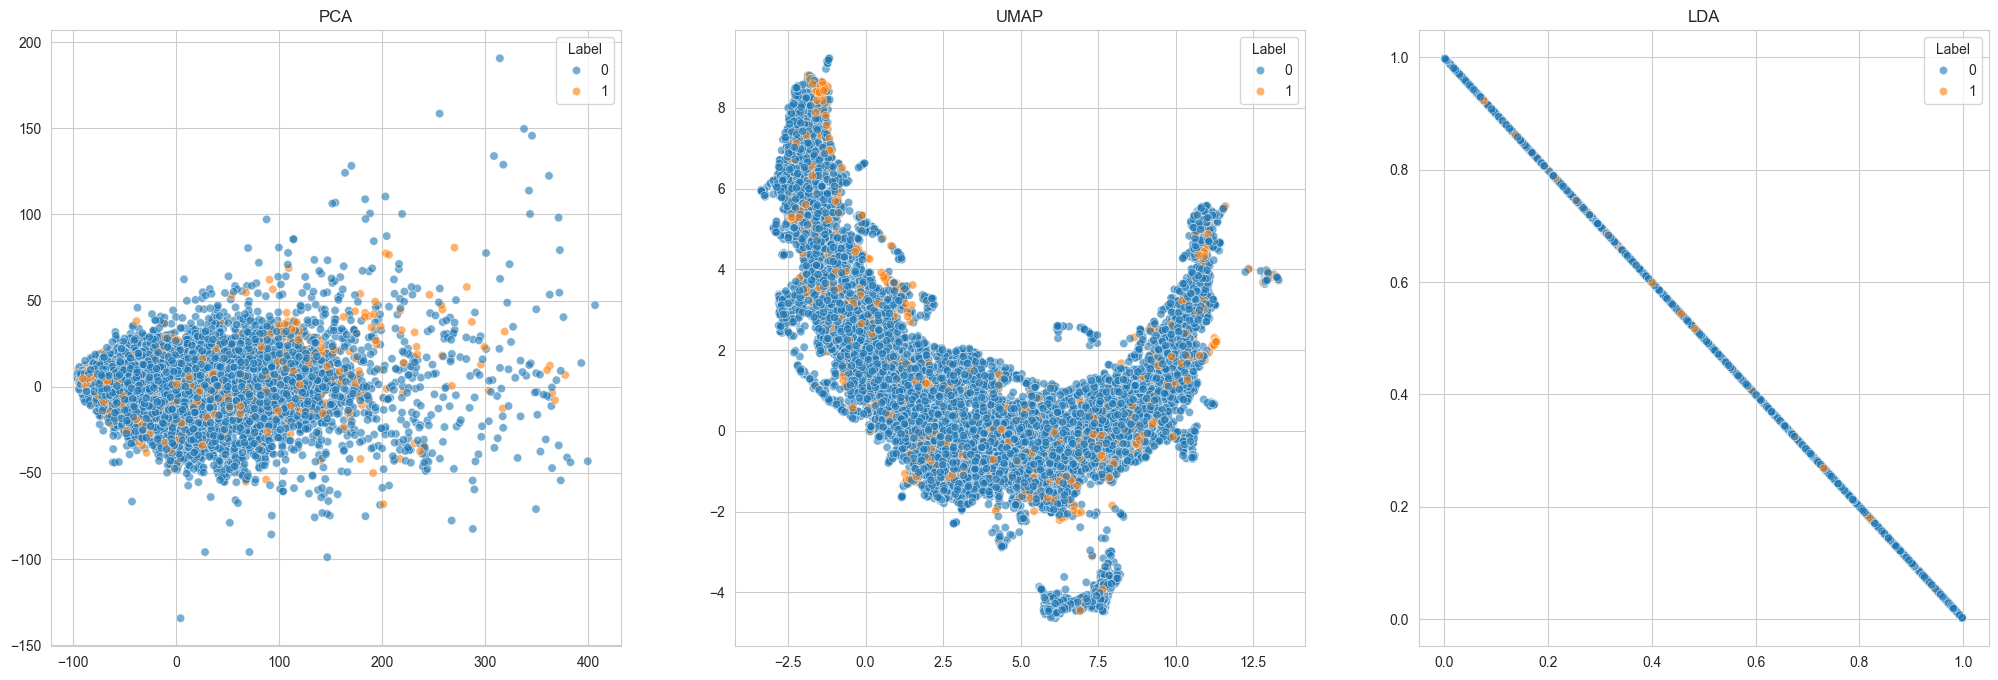

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(25, 8))

sns.scatterplot(data=pd.DataFrame(aminos_pca), x=0, y=1, hue=molecules['Label'], ax=axes[0], alpha=.6)
axes[0].set_title('PCA')
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)

sns.scatterplot(data=pd.DataFrame(aminos_umap), x=0, y=1, hue=molecules['Label'], ax=axes[1], alpha=.6)
axes[1].set_title('UMAP')
axes[1].set_xlabel(None)
axes[1].set_ylabel(None)

sns.scatterplot(data=pd.DataFrame(aminos_lda), x=0, y=1, hue=molecules['Label'], ax=axes[2], alpha=.6)
axes[2].set_title('LDA')
axes[2].set_xlabel(None)
axes[2].set_ylabel(None)

plt.savefig('Figures/Amino_vector_dimensionality_reduction.png')
plt.show()

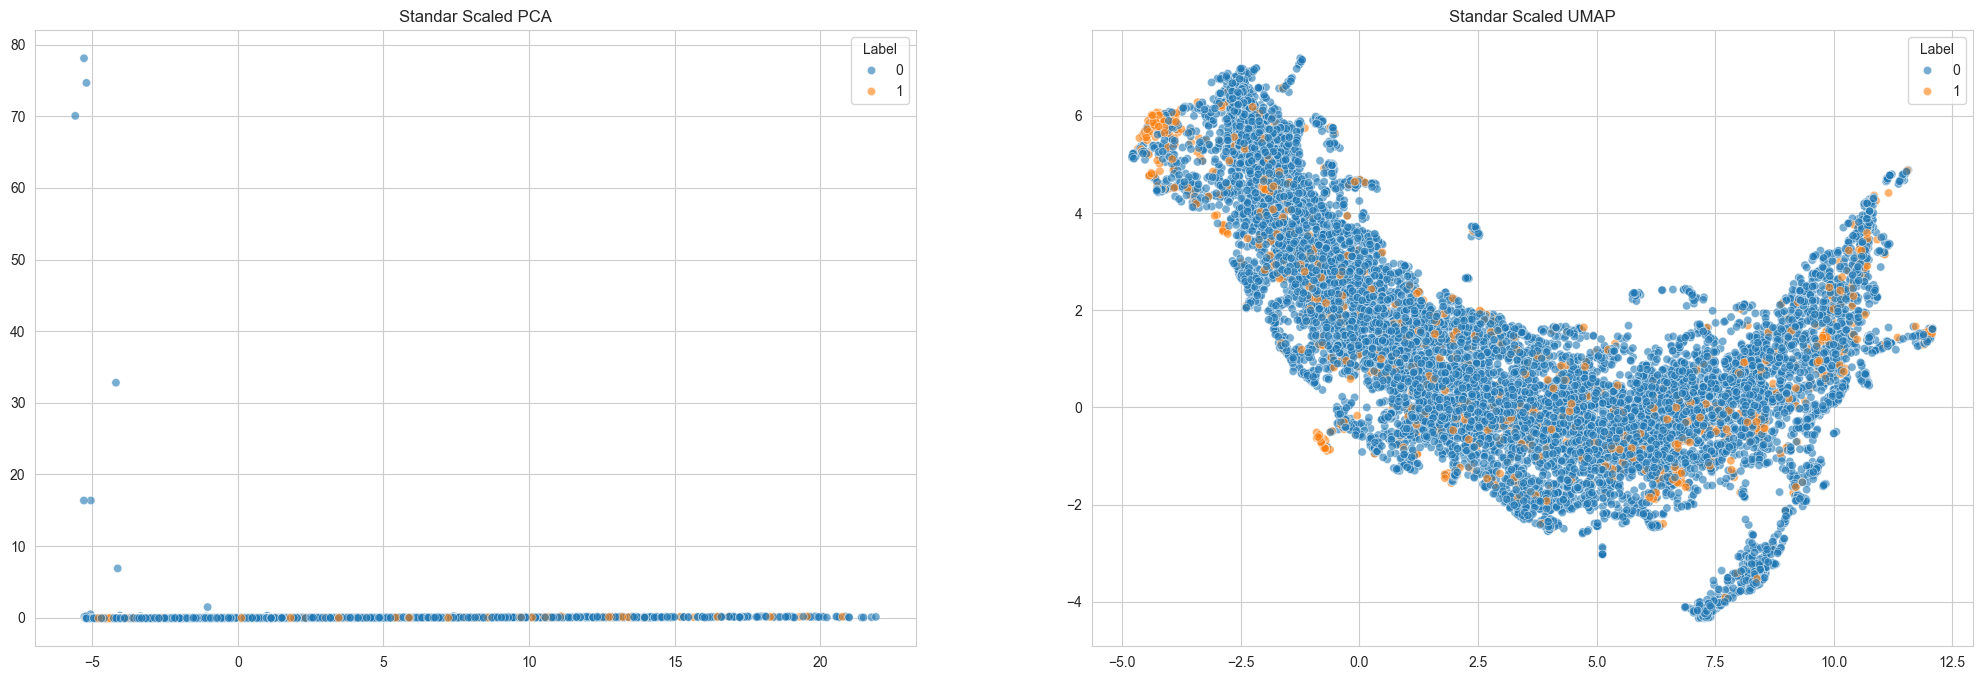

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(25, 8))

sns.scatterplot(data=pd.DataFrame(std_aminos_pca), x=0, y=1, hue=molecules['Label'], ax=axes[0], alpha=.6)
axes[0].set_title('Standar Scaled PCA')
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)

sns.scatterplot(data=pd.DataFrame(std_aminos_umap), x=0, y=1, hue=molecules['Label'], ax=axes[1], alpha=.6)
axes[1].set_title('Standar Scaled UMAP')
axes[1].set_xlabel(None)
axes[1].set_ylabel(None)

plt.show()